In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:

df = pd.read_csv("titanic.csv")
print("Initial Dataset Info:")
print(df.info())
print("\n Missing Values:\n", df.isnull().sum())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

 Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin   

In [5]:
# For Age column
df['Age'] = df['Age'].fillna(df['Age'].mean())

# For Embarked column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [6]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [7]:

scaler = StandardScaler()
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [8]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print("\nPreprocessing Completed Successfully!")
print("X_train shape:", X_train.shape)
print("y_train class distribution:\n", y_train.value_counts())


Preprocessing Completed Successfully!
X_train shape: (712, 8)
y_train class distribution:
 Survived
0    444
1    268
Name: count, dtype: int64


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV


In [12]:
rf_model = RandomForestClassifier(random_state=42)

In [13]:
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.8041958  0.76223776 0.78873239 0.76760563 0.82394366]
Average CV accuracy: 0.7893430513148822


In [15]:
param_grid = { 'n_estimators': [50, 100, 150],   'max_depth': [None, 5, 10],   'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [16]:
best_rf_model = grid_search.best_estimator_
print("\nBest Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation score from GridSearchCV:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation score from GridSearchCV: 0.8384615384615384


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
y_pred_before = rf_model.predict(X_test)

print("BEFORE Hyperparameter Tuning\n")
print("Accuracy:", accuracy_score(y_test, y_pred_before))
print("Precision:", precision_score(y_test, y_pred_before))
print("Recall:", recall_score(y_test, y_pred_before))
print("F1 Score:", f1_score(y_test, y_pred_before))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_before))
print("\nClassification Report:\n", classification_report(y_test, y_pred_before))

BEFORE Hyperparameter Tuning

Accuracy: 0.8100558659217877
Precision: 0.7941176470588235
Recall: 0.7297297297297297
F1 Score: 0.7605633802816901

Confusion Matrix:
 [[91 14]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [19]:
y_pred_after = best_rf_model.predict(X_test)

print("\nAFTER Hyperparameter Tuning\n")
print("Accuracy:", accuracy_score(y_test, y_pred_after))
print("Precision:", precision_score(y_test, y_pred_after))
print("Recall:", recall_score(y_test, y_pred_after))
print("F1 Score:", f1_score(y_test, y_pred_after))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_after))
print("\nClassification Report:\n", classification_report(y_test, y_pred_after))


AFTER Hyperparameter Tuning

Accuracy: 0.8156424581005587
Precision: 0.8360655737704918
Recall: 0.6891891891891891
F1 Score: 0.7555555555555555

Confusion Matrix:
 [[95 10]
 [23 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [20]:

y_probs = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
#%%


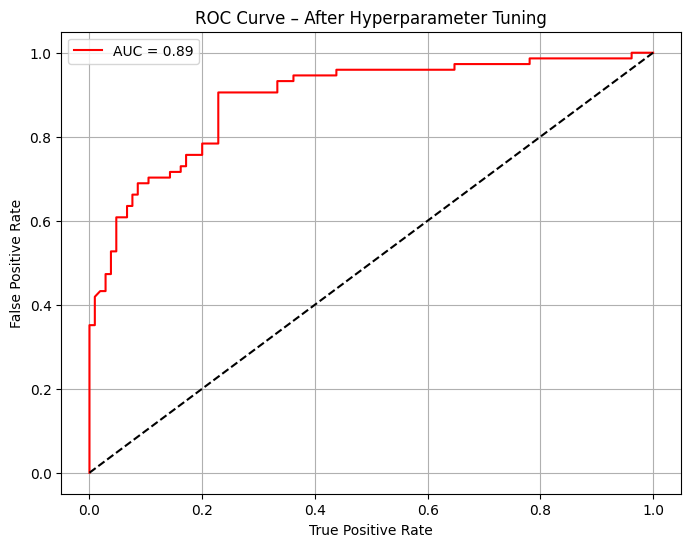

In [21]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC Curve – After Hyperparameter Tuning")
plt.legend()
plt.grid()
plt.show()

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd


In [23]:
df = pd.read_csv("titanic.csv")

In [24]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [26]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [27]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [28]:
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Embarked']

In [29]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')


In [30]:
preprocessor = ColumnTransformer(transformers=[    ('num', numeric_transformer, numeric_features),    ('cat', categorical_transformer, categorical_features)])


In [31]:
pipeline = Pipeline(steps=[('preprocessing', preprocessor),('classifier', RandomForestClassifier(random_state=42))])
#%%


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
param_grid = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5]
}

In [34]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 5, ...], 'classifier__min_samples_split': [2, 5], 'classifier__n_estimators': [100, 150]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [35]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)
print("Test Accuracy:", best_model.score(X_test, y_test))

Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Cross-validation Score: 0.8202206244459764
Test Accuracy: 0.7877094972067039


In [ ]:
My ML Journey Through This Project

Embarking on this Titanic dataset project was like navigating an actual voyage — full of data storms, modeling challenges, and performance waves. Each part of the machine learning pipeline was like a checkpoint that shaped my understanding of real-world ML workflows.

What I Discovered

- Data isn't clean by default: Missing values in `Age` and categorical chaos in `Embarked` made me realize the importance of preprocessing.
- Evaluation is not just accuracy: I now understand why **recall** and **F1-score** are more insightful in imbalanced situations.

What I Would Improve Next Time

- Integrate feature engineering (e.g., extract titles from names like "Mr", "Miss", "Dr").
- Deploy this model with a Streamlit UI so users can test it live.

A Thought That Stuck With Me

> "Building a model is easy, building the right pipeline is what makes you an ML engineer."

This project didn’t just teach me ML, it taught me design thinking in ML — how to keep everything modular, reproducible, and scalable.

 Final Word:

From wrangling missing data to visualizing ROC curves, this Titanic project was more than a coding task — it was a complete data science story. I feel more confident now to face hackathons, interviews, and real-world ML problems with a production mindset.